In [2]:
import os
import pandas as pd
from six.moves import urllib
import matplotlib.pyplot as plt

In [109]:
DOWNLOD_URL = 'https://github.com/mhjensen/MachineLearningMSU-FRIB2020/blob/master/doc/pub/Regression/ipynb/datafiles/EoS.csv?raw=true'
FILE_NAME = 'EoS.csv'
DATA_PATH = os.path.join('/data/', 'HW1')

def fetch_HW1_data(download_url=DOWNLOD_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    urllib.request.urlretrieve(download_url, os.path.join(data_path, file_name))
    
def read_HW1_data(data_path=DATA_PATH,file_name=FILE_NAME):
    file_path = os.path.join(data_path, file_name)
    print(file_path)
    return pd.read_csv(file_path, names=('Density', 'Energy'))

In [135]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data-y_model)**2)/np.sum((y_data-np.mean(y_data))**2)
def MSE(y_data, y_model):
    return np.sum((y_data-y_model)**2)/len(y_data)

In [110]:
fetch_HW1_data()

In [111]:
eos = read_HW1_data()
eos.info()

/data/HW1/EoS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  90 non-null     float64
 1   Energy   90 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [112]:
eos['Energy'] = pd.to_numeric(eos['Energy'], errors='coerce')

In [113]:
#Get rid off NaNs
eos = eos.dropna()
eos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  90 non-null     float64
 1   Energy   90 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


In [114]:
energies, density = eos['Energy'], eos['Density']

In [126]:
X = np.zeros((len(density), 5))
for i in range(X.shape[1]):
    X[:,i]=np.power(density, float(i+1)/3.0)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, energies, test_size=0.2)

In [130]:
beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [131]:
beta

array([-116.57617735,  860.57661492, -908.79893183, 1195.45882676,
        119.04306985])

In [183]:
#predictions
y_tilde = X_train.dot(beta)
# Test
y_tilde_test = X_test.dot(beta)
#Total 
y_total = X.dot(beta)

In [147]:
print(f'Training R2:  {R2(y_train, y_tilde)}')
print(f'Training MSE: {MSE(y_train, y_tilde)}')
print(f'Test R2:      {R2(y_test, y_tilde_test)}')
print(f'Test MSE:     {MSE(y_test, y_tilde_test)}')

Training R2:  0.9999901355244555
Training MSE: 4.830383259327385
Test R2:      0.99997335243139
Test MSE:     6.0339532272228205


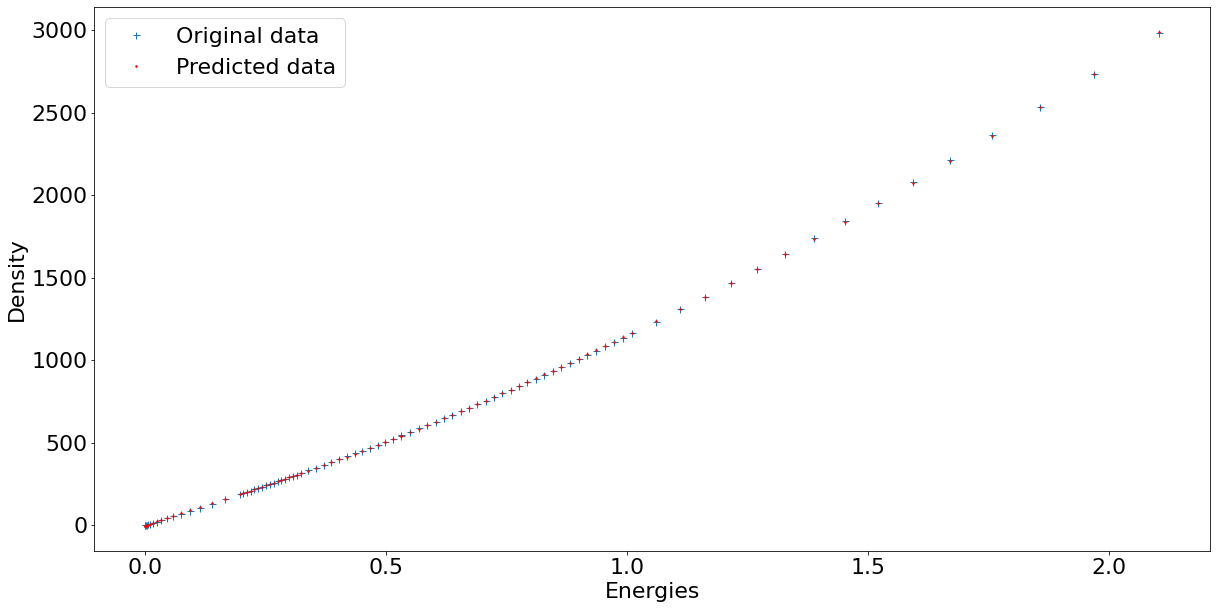

In [200]:
plt.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.plot(density, energies, '+', markersize=7, label='Original data')
plt.plot(density, y_total, 'r.', markersize=3, label='Predicted data')

plt.xlabel('Energies')
plt.ylabel('Density')

plt.legend()

In [202]:
!git init

Initialized empty Git repository in /data/.git/


In [206]:
!git status

On branch master

Initial commit

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   Untitled2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	HW1/
	LA_property-AG.ipynb
	MNIST_AG.ipynb
	Registration_with_downsampled_atlas.ipynb
	Registration_wo_downsampling.ipynb
	Test_w_downsamp.ipynb
	Untitled.ipynb
	Untitled1.ipynb
	ambmc-c57bl6-label-cortex_v0.8.nii
	ambmc-c57bl6-model-symmet_v0.8.nii
	datasets/
	mouse_main/
	mouse_surface/
	preProcData_v_1.0.1.ipynb
	preProcData_v_1.0.2.ipynb
	preProcData_v_1.0.4_ANAT2ATLAS2EPI.ipynb
	scaled_labels.nii.gz
	scaled_template.nii.gz



In [214]:
#!git remote -v
!git commit -m "HW1"

[master (root-commit) 45f44d5] HW1
 1 file changed, 357 insertions(+)
 create mode 100644 Untitled2.ipynb


In [213]:
!git config --global user.email "chercas.kostya@gmail.com"
!git config --global user.name "Chercas"

In [ ]:
!git branch -M main
!git push -u origin main
!yes